<a href="https://colab.research.google.com/github/AlisaYur/Hello-World/blob/master/Laboratory4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

import os
import numpy as np
import matplotlib.pyplot as plt
import tarfile

2.2.0


In [0]:
# Загрузить архив с коллекцией изображений flower_photos.tgz, распаковать в папку flower_photos.
# Внутри папки flower_photos создать две вложенные папки - train и test.
# Скопировать папки с названиями классов цветов в папку train.
# Внутри папки test создать папки с названиями классов цветов. В эти папки переместить по 100 изображений
# соответствующих классов из папки train.

In [30]:
# Если необходимо подключить Google drive к Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Программная загрузка архива с коллекцией изображений flower_photos.tgz, распаковка архива в папку
# flower_photos, задание переменной пути PATH, который будет указывать на папку flower_photos.

URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=URL, 
                                   fname="/content/drive/My Drive/Colab Notebooks/flower_photos.tgz", 
                                   extract=True,
                                   cache_subdir="/content/drive/My Drive/Colab Notebooks/")

PATH = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
# Задание переменной пути PATH, который будет указывать на папку flower_photos.
# Создание переменных пути, указывающих на папки train и test.

PATH = '/content/drive/My Drive/Colab Notebooks/flower_photos'
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [51]:
print(train_dir)
print(test_dir)

/content/drive/My Drive/Colab Notebooks/flower_photos/train
/content/drive/My Drive/Colab Notebooks/flower_photos/test


In [0]:
# Створюємо генератор тренувальних зображень, який може виконувати обробку зображень для підготовки їх
# для подачі на нейронну мережу. Також за допомогою параметра validation_split можна задати розподіл
# зображень на тренувальні та валідаційні.

# Ознайомитись з конструктором ImageDataGenerator, застосувати декілька варіантів обробки зображень:
# rotation_range, shear_range, rescale, horizontal_flip, vertical_flip.

datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1)

In [53]:
# За допомогою функції flow_from_directory завантажити тренувальні та валідаційні зображення в
# структури даних train_generator та val_generator.
# При цьому можна задати розмір зображень (виконати resize), задати розмір батча (пакета).

# Ознайомитись з аргументами функції flow_from_directory. Реалізувати збереження валідаційних
# зображень після обробки в окрему директорію в форматі jpeg (завантаження файлів в цю директорію
# буде відбуватися тільки при застосуванні val_generator, наприклад, при отриманні з нього
# батчів валідаційних зображень).

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
BATCH_SIZE = 119

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=314, 
    subset='validation')

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [54]:
# Количество батчей, на которые разбит train датасет
train_generator.__len__()

28

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Количество изображений в обучающей выборке
number_of_train_images = train_generator.labels.__len__()
number_of_train_images

3306

In [57]:
# Количество батчей, на которые разбит validation датасет
val_generator.__len__()

2

In [60]:
# Створюємо генератор тестових зображень

datagen_test = ImageDataGenerator(
    rescale=1./255)

test_generator = datagen_test.flow_from_directory(
    test_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=500)

Found 3670 images belonging to 5 classes.


In [61]:
# Количество батчей, на которые разбит test датасет
test_generator.__len__()

8

In [62]:
# Как видим, хотя shuffle включено данные в объекте изначально не перемешаны.
# Но они будут перемешиваться между эпохами обучения.
test_generator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [64]:
# train_generator є ітератором (DirectoryIterator), з якого можна на окремих ітераціях отримати
# окремі батчі зображень та їх міток.

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((119, 224, 224, 3), (119, 5))

In [65]:
image_batch[1,:,:,:]

array([[[0.10588236, 0.15294118, 0.15294118],
        [0.10588236, 0.14509805, 0.14901961],
        [0.10588236, 0.14509805, 0.14901961],
        ...,
        [0.16862746, 0.06666667, 0.11764707],
        [0.16862746, 0.06666667, 0.11764707],
        [0.17254902, 0.07058824, 0.12156864]],

       [[0.1254902 , 0.14509805, 0.16078432],
        [0.1254902 , 0.16078432, 0.14901961],
        [0.1254902 , 0.16078432, 0.14901961],
        ...,
        [0.17254902, 0.07058824, 0.12156864],
        [0.17254902, 0.07058824, 0.12156864],
        [0.1764706 , 0.07450981, 0.1254902 ]],

       [[0.07843138, 0.15686275, 0.14901961],
        [0.10980393, 0.1764706 , 0.15294118],
        [0.10980393, 0.1764706 , 0.15294118],
        ...,
        [0.1764706 , 0.07450981, 0.11764707],
        [0.1764706 , 0.07450981, 0.11764707],
        [0.18039216, 0.07058824, 0.11764707]],

       ...,

       [[0.8588236 , 0.5294118 , 0.24705884],
        [0.87843144, 0.5058824 , 0.2392157 ],
        [0.87843144, 0

In [66]:
# База зображень вже поділена на класи, яким відповідають найменування папок
print (train_generator.class_indices)


{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


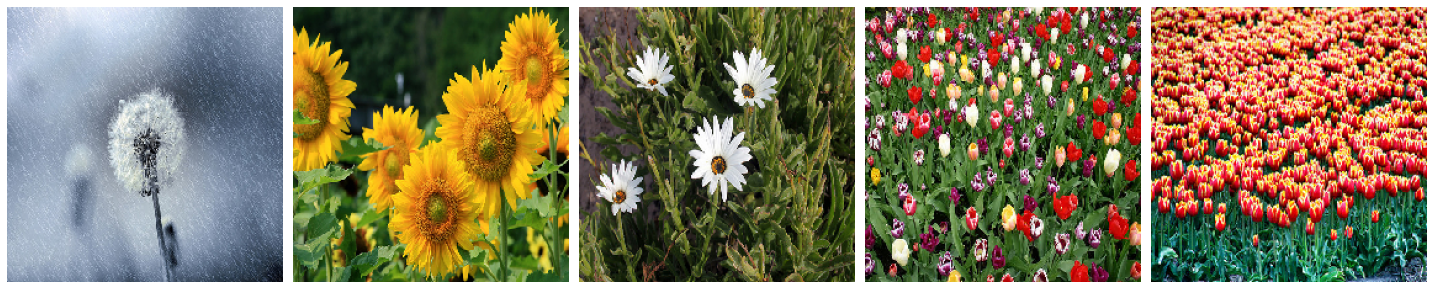

In [68]:
# Відобразимо деякі з валідаційних зображень

validation_data, _ = next(val_generator)

sample_validation_images = validation_data[:5]

# This function will plot images in the form of a grid with 1 row and 5 columns where
# images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_validation_images)

In [0]:
# Створюємо структуру нейронної мережі

hidden_layer_size = 4
output_size = 5

model = tf.keras.Sequential([
    
  tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 8)       0         
_________________________________________________________________
flatten (Flatten)            (None, 98568)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 394276    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 25        
Total params: 394,525
Trainable params: 394,525
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Компілюємо створену модель

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [72]:
# Обучение нейронной сети.
# Нейронная сеть простейшая, даёт ужасные результаты, но здесь главное изучить возможность
# подачи структуры данных в виде генератора на вход сети.

max_epochs = 1

history = model.fit(train_generator,                                      
                    epochs=max_epochs,                    
                    validation_data=val_generator)

28/28 [==============================] - 16s 573ms/step - loss: 1.6981 - accuracy: 0.2362 - val_loss: 1.6083 - val_accuracy: 0.2445


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/Lab4.h5')

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Lab4.h5')

In [78]:
# Оценка эффективности нейронной сети при помощи выборки контрольных (тестовых) изображений

test_loss, test_accuracy = model.evaluate(test_generator)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

8/8 [==============================] - 13s 2s/step - loss: 1.6083 - accuracy: 0.2447

Test loss: 1.61. Test accuracy: 24.47%
